## Logistic Regression Demo
Shown the basic case and treatments for special cases:
- imbalanced datasets
- too many parameters (regularization)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, cross_validation
from sklearn import datasets

In [6]:
# function to get data samples
def get_dataset(N_datapoints = 100000, class_ratio=0.5):
  num_observations_a = int(class_ratio * N_datapoints)
  num_observations_b = int((1 - class_ratio) * N_datapoints)
  np.random.seed(12)
  feature1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations_a)
  feature2 = np.random.multivariate_normal([1, 1], [[1, .75],[.75, 1]], num_observations_b)
  X = np.vstack((feature1, feature2)).astype(np.float32)
  y = np.hstack((np.zeros(num_observations_a), np.ones(num_observations_b)))
  y = np.reshape(y, (len(y), 1))
  data = np.concatenate((X, y), axis=1)
  df = pd.DataFrame(data, columns =['x1', 'x2', 'label'])
  return df

In [11]:
def get_dataset(N_datapoints = 100000, class_ratio=0.5, N_features_noise=0):
    num_observations_a = int(class_ratio * N_datapoints)
    num_observations_b = int((1 - class_ratio) * N_datapoints)
    np.random.seed(12)

    features = []
    feature1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations_a)
    feature2 = np.random.multivariate_normal([1, 1], [[1, .75],[.75, 1]], num_observations_b)
    # noise features of n datapoints
    features_noise = []
    num_observations_noise = 0
    noise_features = []
    for i in range(N_features_noise):
        num_observations_noise += N_datapoints
        noise_features.append(np.random.choice([0, 1], size=(num_observations_noise), p=[0.5, 0.5]))
        features_noise.append(np.random.multivariate_normal([0, 0], [[1, 0.],[0., 1]], N_datapoints))

    # collect all the features 
    features.extend([feature1])
    features.extend([feature2])
    features.extend(features_noise)

    X = np.vstack(features).astype(np.float32)
    y = np.hstack((
                 np.zeros(num_observations_a), 
                 np.ones(num_observations_b), 
                 noise_features
#                 np.random.choice([0, 1], size=(num_observations_noise), p=[0.5, 0.5])
                ))
    y = np.reshape(y, (len(y), 1))
    data = np.concatenate((X, y), axis=1)
    col_names = []
    col_names.extend(['x1'])
    col_names.extend(['x2'])
    for i in range(N_features_noise):
        col_names.extend(['x_noise_'+str(i)])
    col_names.extend(['label'])  
    print col_names
    print data.shape
    
    df = pd.DataFrame(data, columns=col_names)
    return df

In [12]:
df = get_dataset(N_datapoints = 100000, class_ratio=0.5, N_features_noise=10)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

## Scenario 1) Basic Case

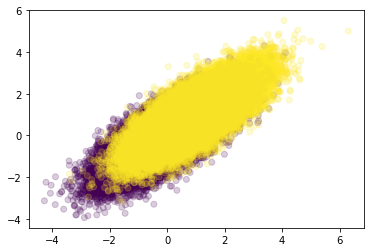

In [5]:
# Not imbalanaced datasets (both classes same number of rows)
df = get_dataset(class_ratio=0.5)
fig, ax = plt.subplots()
plt.scatter(df['x1'].values, df['x2'].values, c=df['label'].values, alpha = .2)
display(fig)

In [6]:
predicted = cross_validation.cross_val_predict(LogisticRegression(), df[['x1', 'x2']], df['label'], cv=10)
print metrics.accuracy_score(df['label'], predicted)

0.70376


## Scenario 2) Imbalanced Dataset

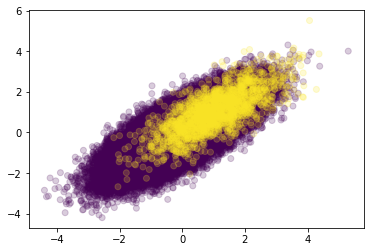

In [20]:
# Very imbalanced dataset (e.g. a study of fraud data)
df = get_dataset(class_ratio=0.98)
fig, ax = plt.subplots()
plt.scatter(df['x1'].values,df['x2'].values, c=df['label'].values, alpha = .2)
display(fig)

####  => without any correction

In [21]:
predicted = cross_validation.cross_val_predict(LogisticRegression(), df[['x1', 'x2']], df['label'], cv=10)
print metrics.accuracy_score(df['label'], predicted)

0.98


!!! so 98% precision... as the input data..

####  => with correction

In [22]:
# we correct for the imbalanced using the argument class_weight='balanced'
predicted = cross_validation.cross_val_predict(LogisticRegression(class_weight ='balanced'), df[['x1', 'x2']], df['label'], cv=10)
print metrics.accuracy_score(df['label'], predicted)

0.7086


## Scenario 3) Too many (unrelated) features

In [56]:
df = get_dataset(N_datapoints = 100000, class_ratio=0.5, N_features_noise=10)

ValueError: Shape of passed values is (3, 1100000), indices imply (99, 1100000)

In [55]:
df_pl =df.sample(frac=0.01)
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
df_pl.plot.scatter('x1', 'x2',c='label', ax=ax[0])
df_pl.plot.scatter('x1', 'x_noise_1',c='label', ax=ax[1])
df_pl.plot.scatter('x_noise_1', 'x_noise_2',c='label', ax=ax[2])


# ax[0].scatter(df_pl['x1'].values,df['x2'].values, c=df_pl['label'].values, alpha = .2)
# ax[1].scatter(df_pl['x1'].values,df['x3'].values, c=df_pl['label'].values, alpha = .2)
# ax[2].scatter(df_pl['x1'].values,df['x3'].values, c=df_pl['label'].values, alpha = .2)
display(fig)

KeyError: 'x_noise_1'